In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil
dataEC2Costs = '/home/joe/data/datadog/ec2-costs-before-RIs.csv'
dataService = '/home/joe/data/datadog/by-service.csv'
dataUsageType = '/home/joe/data/datadog/by-usage-type.csv'
dfEC2Costs = pd.read_csv(dataEC2Costs)
dfService = pd.read_csv(dataService)
dfUsageType = pd.read_csv(dataUsageType)
missingEC2s = [19,20]

In [278]:
dfService.head(5)

,Service,API Gateway($),Elastic File System($),X-Ray($),SES($),SNS($),ElastiCache($),SimpleDB($),Tax($),Config($),...,WAF($),Redshift($),EC2 Container Registry (ECR)($),EC2-Instances($),SQS($),Budgets($),CloudSearch($),Athena($),EC2-Other($),Total cost ($)
0,Service Total,5.920412,0.919388,0.0,0.100271,14.449259,6588.672,0.000027,3601.57,1231.663,...,14.999997,7273.35,96.036537,2.748019e+06,110.568121,0,12528.303028,0.12901,671008.500167,4.655485e+06
1,Month 1,0.486613,0.919388,NaN,0.033560,6.732994,2220.096,0.000008,1284.13,338.221,...,5.000000,2449.35,50.565163,8.541583e+05,31.096825,0,4492.547501,0.12431,245472.554851,1.554169e+06
2,Month 2,0.517401,0.000000,NaN,0.034722,4.125028,2148.480,0.000012,1158.03,415.720,...,4.999997,2372.95,30.223630,8.840529e+05,30.754074,0,3953.060088,0.00470,213944.783614,1.492007e+06
3,Month 3,4.916398,0.000000,0.0,0.031989,3.591236,2220.096,0.000007,1159.41,477.722,...,5.000000,2451.05,15.247744,1.009808e+06,48.717223,0,4082.695439,NaN,211591.161702,1.609309e+06


In [279]:
dfService.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Service                          4 non-null      object 
 1   API Gateway($)                   4 non-null      float64
 2   Elastic File System($)           4 non-null      float64
 3   X-Ray($)                         2 non-null      float64
 4   SES($)                           4 non-null      float64
 5   SNS($)                           4 non-null      float64
 6   ElastiCache($)                   4 non-null      float64
 7   SimpleDB($)                      4 non-null      float64
 8   Tax($)                           4 non-null      float64
 9   Config($)                        4 non-null      float64
 10  Kinesis Firehose($)              4 non-null      float64
 11  WorkSpaces($)                    2 non-null      float64
 12  Route 53($)               

In [280]:
dfUsageType.head(5)

,UsageType,APS3-DataTransfer-In-Bytes($),USW1-APN2-AWS-Out-Bytes($),USW1-USE2-AWS-In-Bytes($),DeliveryAttempts-SMTP($),USW2-NatGateway-Bytes($),USE1-USE2-AWS-Out-Bytes($),USW2-UGW1-AWS-Out-Bytes($),APS3-RDS:GP2-Storage($),EU-DataTransfer-In-Bytes($),...,JP-Requests-Tier2-HTTPS($),USE2-FreeEventsRecorded($),BoxUsage:t2.xlarge($),us-east-2-KMS-Requests($),USW1-EUW2-AWS-In-Bytes($),RDS:Multi-AZ-StorageUsage($),APS3-APS1-AWS-Out-Bytes($),HeavyUsage:m3.2xlarge($),USE1-EUC1-AWS-Out-Bytes($),Total cost ($)
0,UsageType Total,0,0.017371,0,0,3.800000e-07,171.055233,1.400000e-07,1.965004,0,...,11.641636,0,256.478,0.000042,0,12.053761,0.000014,16024.235543,1694.964273,4.655485e+06
1,Month 3,0,0.001450,0,0,NaN,68.021348,NaN,0.655003,0,...,4.146440,0,3.948,0.000006,0,4.053760,0.000005,5399.649936,613.066400,1.554169e+06
2,Month 2,0,0.007505,0,0,NaN,56.901303,NaN,0.654998,0,...,3.857268,0,98.528,0.000027,0,4.000003,0.000003,5225.467680,556.394938,1.492007e+06
3,Month 1,0,0.008416,0,0,3.800000e-07,46.132582,1.400000e-07,0.655003,0,...,3.637927,0,154.002,0.000009,0,3.999997,0.000006,5399.117927,525.502935,1.609309e+06


In [281]:
dfUsageType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 710 entries, UsageType to Total cost ($)
dtypes: float64(559), int64(150), object(1)
memory usage: 22.3+ KB


In [282]:
dfEC2Costs.head(5)

,EC2-Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 17,Week 18,Week 19,Week 20,Week 21,Week 22,Week 23,Week 24,Week 25,Week 26
0,1,"$40,622.21","$36,888.26","$36,910.70","$37,140.28","$37,181.08","$37,034.22","$37,411.04","$37,714.68","$37,074.65",...,"$45,532.70","$46,785.87","$49,711.79","$50,500.74","$50,522.24","$49,326.39","$49,299.11","$62,570.05","$85,672.67","$73,250.49"
1,2,"$20,019.22","$20,594.31","$20,915.66","$23,208.02","$30,047.39","$30,795.16","$31,174.00","$32,520.12","$34,649.24",...,"$40,436.34","$40,641.72","$40,700.10","$40,710.81","$40,902.12","$41,283.48","$42,171.36","$42,687.96","$43,086.54","$43,960.75"
2,3,"$59,665.66","$61,938.54","$62,283.65","$63,667.58","$68,540.23","$71,801.41","$72,370.87","$73,683.88","$75,918.98",...,"$104,932.84","$102,258.36","$66,631.54","$42,481.09","$46,612.39","$43,857.73","$26,019.21","$20,914.81","$15,780.66","$10,701.87"
3,4,"$17,140.20","$17,708.04","$17,775.24","$17,860.08","$18,910.92","$19,773.60","$20,299.44","$20,919.78","$21,272.58",...,"$28,157.98","$27,631.98","$27,631.72","$28,772.13","$31,755.70","$32,106.50","$31,950.52","$32,824.60","$34,643.33","$30,894.52"
4,5,"$3,140.84","$4,455.79","$5,150.52","$6,172.86","$7,733.47","$10,970.52","$14,296.35","$17,659.14","$14,167.01",...,"$20,820.97","$19,923.63","$18,803.02","$28,986.57","$34,112.73","$26,520.98","$27,102.72","$29,119.87","$32,981.04","$39,579.43"


In [283]:
dfEC2Costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EC2-Name  29 non-null     int64 
 1   Week 1    27 non-null     object
 2   Week 2    27 non-null     object
 3   Week 3    27 non-null     object
 4   Week 4    27 non-null     object
 5   Week 5    27 non-null     object
 6   Week 6    27 non-null     object
 7   Week 7    27 non-null     object
 8   Week 8    28 non-null     object
 9   Week 9    28 non-null     object
 10  Week 10   28 non-null     object
 11  Week 11   28 non-null     object
 12  Week 12   28 non-null     object
 13  Week 13   28 non-null     object
 14  Week 14   28 non-null     object
 15  Week 15   28 non-null     object
 16  Week 16   28 non-null     object
 17  Week 17   28 non-null     object
 18  Week 18   29 non-null     object
 19  Week 19   29 non-null     object
 20  Week 20   29 non-null     object
 21  Week 21   29 non-n

In [284]:
dfEC2CostsT = dfEC2Costs.set_index('EC2-Name').transpose().fillna(0.0)
dfEC2CostsT = dfEC2CostsT.reset_index(0)
dfEC2CostsT = dfEC2CostsT.rename(columns={'index':'Weeks'})
dfEC2CostsT.head(5)

EC2-Name,Weeks,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Week 1,"$40,622.21","$20,019.22","$59,665.66","$17,140.20","$3,140.84","$8,232.70","$16,287.52",0,"$10,510.02",...,"$3,504.41","$3,214.85","$1,040.33","$1,847.49","$2,290.18","$1,521.63","$2,916.19","$1,916.04",$885.78,"$1,117.20"
1,Week 2,"$36,888.26","$20,594.31","$61,938.54","$17,708.04","$4,455.79","$10,119.57","$16,418.70",0,"$10,341.07",...,"$3,497.09","$3,214.85","$1,027.82","$1,614.48","$2,290.18","$1,523.63","$2,891.45","$1,916.04",$718.92,"$1,117.20"
2,Week 3,"$36,910.70","$20,915.66","$62,283.65","$17,775.24","$5,150.52","$10,690.47","$16,516.87",0,"$10,722.40",...,"$3,497.09","$3,214.85","$1,027.82","$1,614.48","$2,290.18","$1,521.37","$2,891.45","$1,916.04",$791.05,"$1,117.20"
3,Week 4,"$37,140.28","$23,208.02","$63,667.58","$17,860.08","$6,172.86","$10,691.10","$16,644.64",0,"$10,837.78",...,"$3,495.76","$3,212.19","$1,027.82","$1,657.97","$2,289.51","$1,682.16","$2,891.45","$2,570.77","$1,138.00","$1,117.07"
4,Week 5,"$37,181.08","$30,047.39","$68,540.23","$18,910.92","$7,733.47","$11,535.72","$16,655.72",0,"$10,785.72",...,"$3,497.09","$3,214.85","$1,307.12","$1,706.05","$2,392.38","$1,721.66","$2,891.45","$2,775.86","$1,782.15","$1,117.20"


In [285]:
dfEC2CostsT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weeks   26 non-null     object
 1   1       26 non-null     object
 2   2       26 non-null     object
 3   3       26 non-null     object
 4   4       26 non-null     object
 5   5       26 non-null     object
 6   6       26 non-null     object
 7   7       26 non-null     object
 8   8       26 non-null     object
 9   9       26 non-null     object
 10  10      26 non-null     object
 11  11      26 non-null     object
 12  12      26 non-null     object
 13  13      26 non-null     object
 14  14      26 non-null     object
 15  15      26 non-null     object
 16  16      26 non-null     object
 17  17      26 non-null     object
 18  18      26 non-null     object
 19  21      26 non-null     object
 20  22      26 non-null     object
 21  23      26 non-null     object
 22  24      26 non-null     obje

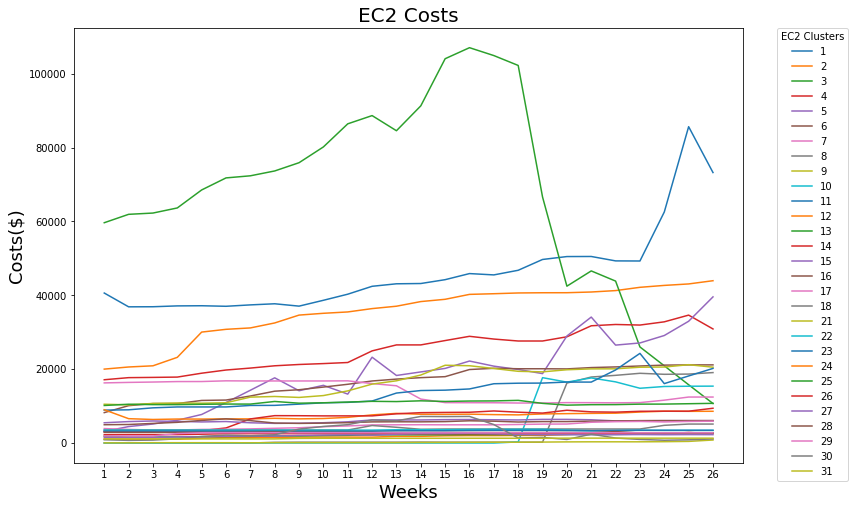

In [286]:
df = dfEC2CostsT
fig = plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Weeks", color='black', fontsize=18)

regex = re.compile(r'Week\s+', flags=re.IGNORECASE)
df['Weeks'] = df['Weeks'].str.replace(regex,'')

cols = df.columns.values.tolist()
cols.pop(0)

colsList = []
colsLabels = []
for col in cols:
    df[col]= df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
    plt.plot(df['Weeks'],df[col])
    colsList.append(df[col])
    colsLabels.append(col)

plt.legend(cols,title="EC2 Clusters",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

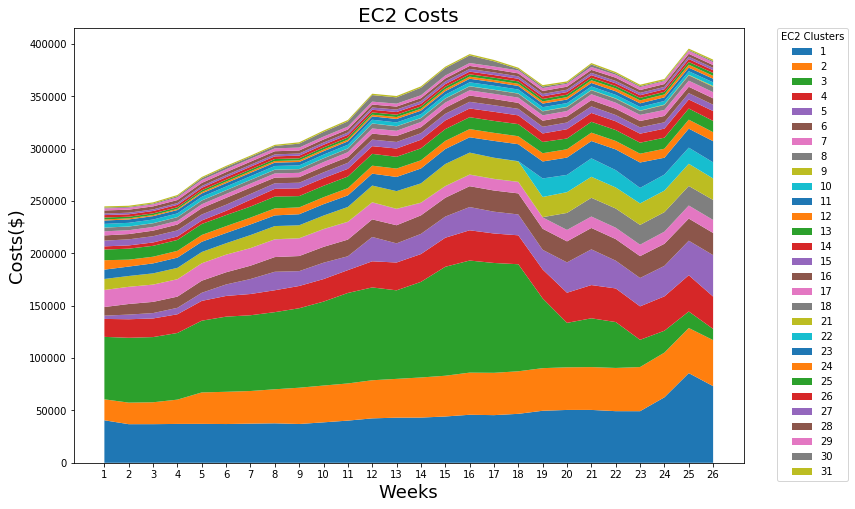

In [287]:
figArea = plt.figure(figsize=(12,8))
plt.title('EC2 Instances')
ax=plt.gca()
ax.set_title("EC2 Costs", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Weeks", color='black', fontsize=18)
#plt.legend(cols,title="EC2-Name",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)

plt.stackplot(df['Weeks'],colsList,labels=colsLabels)
plt.legend(loc='upper left',title='EC2 Clusters',bbox_to_anchor=(1.05,1),borderaxespad=0)
